In [6]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# sk learn imports for the ML model
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import root_mean_squared_error

In [ ]:
df = pd.read_parquet('/workspaces/MLOps-Model-Development-to-Production-deployment/Data/green_tripdata_2025-01.parquet')
df.head()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,cbd_congestion_fee
0,2,2025-01-01 00:03:01,2025-01-01 00:17:12,N,1.0,75,235,1.0,5.93,24.70,...,0.5,6.80,0.00,NaN,1.0,34.00,1.0,1.0,0.00,0.0
1,2,2025-01-01 00:19:59,2025-01-01 00:25:52,N,1.0,166,75,1.0,1.32,8.60,...,0.5,0.00,0.00,NaN,1.0,11.10,2.0,1.0,0.00,0.0
2,2,2025-01-01 00:05:29,2025-01-01 00:07:21,N,5.0,171,73,1.0,0.41,25.55,...,0.0,0.00,0.00,NaN,1.0,26.55,2.0,2.0,0.00,0.0
3,2,2025-01-01 00:52:24,2025-01-01 01:07:52,N,1.0,74,223,1.0,4.12,21.20,...,0.5,6.13,6.94,NaN,1.0,36.77,1.0,1.0,0.00,0.0
4,2,2025-01-01 00:25:05,2025-01-01 01:01:10,N,1.0,66,158,1.0,4.71,33.80,...,0.5,7.81,0.00,NaN,1.0,46.86,1.0,1.0,2.75,0.0


## Preprocessing of data

In [8]:
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

df = df[(df.duration >= 1) & (df.duration <= 60)]

categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

df[categorical] = df[categorical].astype(str)

In [9]:
train_dicts = df[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

target = 'duration'
y_train = df[target].values

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_train)

root_mean_squared_error(y_train, y_pred)

6.704280605544523

The DictVectorizer expands these into a flat numeric vector, where:

Categorical features are one-hot encoded.

Numerical features are passed through as-is.

So, after fit_transform(), the result is a matrix of shape:


(n_samples, n_features)
Where n_features includes:

The number of unique values across all categorical features (from one-hot encoding).

Plus the number of numerical features.
| color | size | weight |
| ----- | ---- | ------ |
| red   | S    | 1.1    |
| blue  | M    | 2.0    |
| green | L    | 3.2    |


color: 3 unique values → 3 one-hot columns
size: 3 unique values → 3 one-hot columns
weight: numeric → 1 column

So the resulting matrix has:

3 rows × (3 + 3 + 1) = 3 × 7 where is 7 is the input features.

In [10]:
## these are the features of the matrix. So it is not the columnsn that we choose but the unique values in eech o the categorical coln that are encoded as a one hot feature!

print(dv.get_feature_names_out())
# print(len(dv.get_feature_names_out())) ## 449

['DOLocationID=1' 'DOLocationID=10' 'DOLocationID=100' 'DOLocationID=101'
 'DOLocationID=102' 'DOLocationID=106' 'DOLocationID=107'
 'DOLocationID=108' 'DOLocationID=11' 'DOLocationID=111'
 'DOLocationID=112' 'DOLocationID=113' 'DOLocationID=114'
 'DOLocationID=116' 'DOLocationID=117' 'DOLocationID=119'
 'DOLocationID=12' 'DOLocationID=120' 'DOLocationID=121'
 'DOLocationID=122' 'DOLocationID=123' 'DOLocationID=124'
 'DOLocationID=125' 'DOLocationID=126' 'DOLocationID=127'
 'DOLocationID=128' 'DOLocationID=129' 'DOLocationID=13'
 'DOLocationID=130' 'DOLocationID=131' 'DOLocationID=132'
 'DOLocationID=133' 'DOLocationID=134' 'DOLocationID=135'
 'DOLocationID=136' 'DOLocationID=137' 'DOLocationID=138'
 'DOLocationID=139' 'DOLocationID=14' 'DOLocationID=140'
 'DOLocationID=141' 'DOLocationID=142' 'DOLocationID=143'
 'DOLocationID=144' 'DOLocationID=145' 'DOLocationID=146'
 'DOLocationID=147' 'DOLocationID=148' 'DOLocationID=149'
 'DOLocationID=15' 'DOLocationID=150' 'DOLocationID=151'
 'D

/tmp/ipykernel_2556/792334868.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_2556/792334868.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


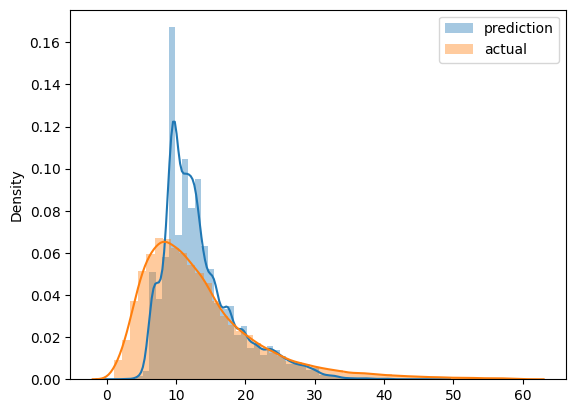

In [11]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()
plt.show()

In [12]:
def preprocess_df(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [ ]:
df_train = preprocess_df('/workspaces/MLOps-Model-Development-to-Production-deployment/Data/green_tripdata_2025-01.parquet')
df_val = preprocess_df('/workspaces/MLOps-Model-Development-to-Production-deployment/Data/green_tripdata_2025-02.parquet')

print(df_train.shape, df_val.shape)

(46307, 22) (44218, 22)


In [14]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [15]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

6.098889826481847

In [17]:
lr = Lasso(0.01)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

root_mean_squared_error(y_val, y_pred)

8.028312781338874